In [7]:
import numpy as np
import matplotlib.pyplot as plt
from CTRNNclass import *
from pyloricfitness import *

In [17]:
#Compile all the "best individuals" which are pyloric-like
file = open('../Pyloric CTRNN Genomes/savinggoodgenomes.dat')
i = 0
g = 0
f = 0
genomes = np.zeros((79,15))
fitnesses = np.zeros(79)
for item in file:
    # print(item)
    if i%3==0:
        # print('genome',item)
        genomes[g] = np.fromstring(item,sep=' ')
        g+=1
    if i%3==1:
        # print('fitness',item)
        # print(np.fromstring(item,sep=' '))
        fitnesses[f] = float(item)
        f+=1
    i += 1

#reformat from tc,bias,weights to weights,biases,tc
for i in range(len(genomes)):
    tcs = genomes[i,0:3]
    biases = genomes[i,3:6]
    weights = genomes[i,6:]
    genomes[i]=np.concatenate((weights,biases,tcs))

In [18]:
max_idx = np.where(fitnesses==max(fitnesses))[0][0]
print(genomes[max_idx])

[  1.25966  11.7919   -8.9466  -14.1082   13.505    15.8346   -4.73326
 -14.9413    7.13229   2.68606  -5.92321  -8.09309   1.0782    1.45534
   1.713  ]


[  1.25966  11.7919   -8.9466  -14.1082   13.505    15.8346   -4.73326
 -14.9413    7.13229   2.68606  -5.92321  -8.09309   1.0782    1.45534
   1.713  ]
[ 2.68606 -5.92321 -8.09309]


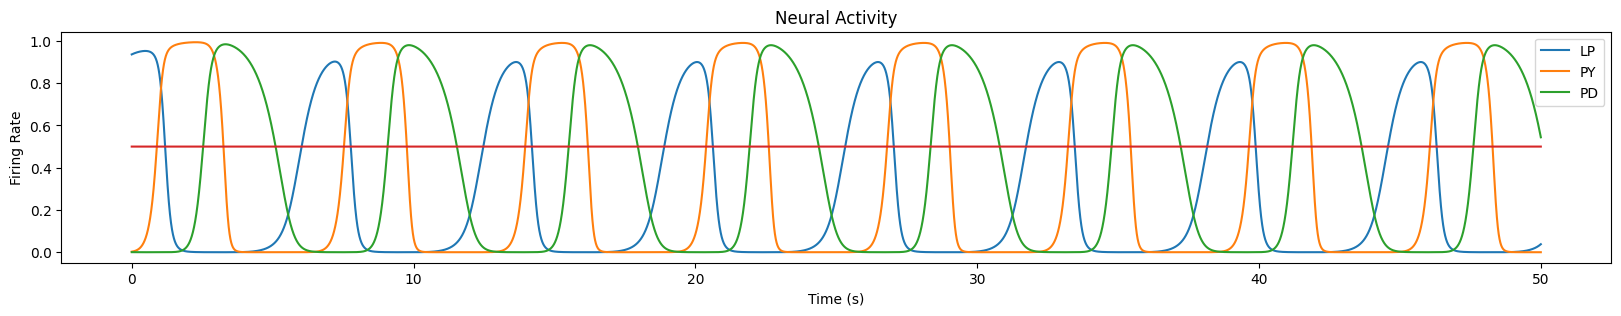

26.875524689284884


In [23]:
idx = max_idx
print(genomes[idx])

C = CTRNN(3,.001,50,None,genomes[idx])
print(C.Biases)
C.initializeState(np.array([0.,0.,0.]))
C.run(0)
C.plot()

print(pyloriclike(genomes[idx]))